## To Do

* Posterior predictive sampling
    * Univariate families **DONE**
    * Multivariate families
* Model string representation
* Model aliases

In [1]:
import bambi as bmb

In [2]:
#%load_ext autoreload
#%autoreload 2

In [3]:
data = bmb.load_data("my_data")

In [4]:
formula = bmb.Formula("y ~ x")
model = bmb.Model(formula, data)
model.build()

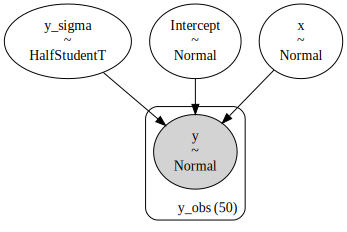

In [5]:
model.graph()

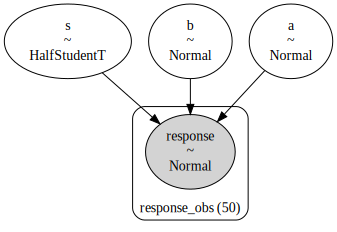

In [6]:
model.set_alias({"Intercept": "a", "x": "b", "sigma": "s", "y": "response"})
model.build()
model.graph()

In [7]:
idata = model.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [s, a, b]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2 seconds.


In [8]:
idata.posterior

<xarray.Dataset>
Dimensions:  (chain: 2, draw: 1000)
Coordinates:
  * chain    (chain) int64 0 1
  * draw     (draw) int64 0 1 2 3 4 5 6 7 8 ... 992 993 994 995 996 997 998 999
Data variables:
    a        (chain, draw) float64 0.2548 0.04297 0.3121 ... 0.3327 -0.2441
    b        (chain, draw) float64 -0.02653 -0.05624 0.1017 ... 0.2671 0.212
    s        (chain, draw) float64 0.982 1.082 0.8758 ... 0.9694 1.031 0.93
Attributes:
    created_at:                  2022-12-06T19:26:02.033075
    arviz_version:               0.14.0
    inference_library:           pymc
    inference_library_version:   4.1.7
    sampling_time:               2.1530702114105225
    tuning_steps:                1000
    modeling_interface:          bambi
    modeling_interface_version:  0.9.1

In [9]:
model.predict(idata)

In [10]:
idata.posterior

<xarray.Dataset>
Dimensions:        (chain: 2, draw: 1000, response_obs: 50)
Coordinates:
  * chain          (chain) int64 0 1
  * draw           (draw) int64 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * response_obs   (response_obs) int64 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49
Data variables:
    a              (chain, draw) float64 0.2548 0.04297 ... 0.3327 -0.2441
    b              (chain, draw) float64 -0.02653 -0.05624 ... 0.2671 0.212
    s              (chain, draw) float64 0.982 1.082 0.8758 ... 1.031 0.93
    response_mean  (chain, draw, response_obs) float64 0.2429 0.2813 ... -0.364
Attributes:
    created_at:                  2022-12-06T19:26:02.033075
    arviz_version:               0.14.0
    inference_library:           pymc
    inference_library_version:   4.1.7
    sampling_time:               2.1530702114105225
    tuning_steps:                1000
    modeling_interface:          bambi
    modeling_interface_version:  0.9.1

In [11]:
formula = bmb.Formula("y ~ x", "sigma ~ x")
model = bmb.Model(formula, data)
model.build()

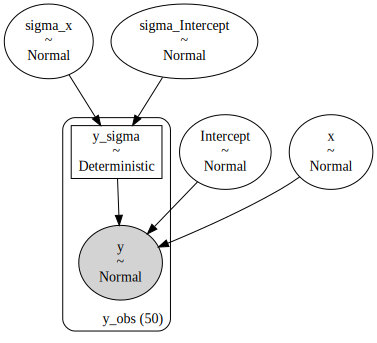

In [12]:
model.graph()

In [13]:
idata = model.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Intercept, x, sigma_Intercept, sigma_x]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 5 seconds.


In [14]:
idata

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [15]:
model.predict(idata)
idata

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

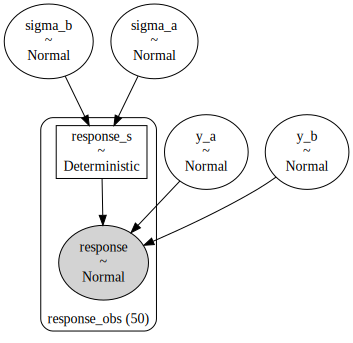

In [16]:
aliases = {
    "y": {"Intercept": "y_a", "x": "y_b", "y": "response"},
    "sigma": {"Intercept": "sigma_a", "x": "sigma_b", "sigma": "s"}
}
model.set_alias(aliases)
model.build()
model.graph()

In [17]:
idata = model.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [y_a, y_b, sigma_a, sigma_b]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4 seconds.


In [18]:
model.predict(idata)
idata

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

In [19]:
data = bmb.load_data("ANES")
data.head()

,vote,age,party_id
0,clinton,56,democrat
1,trump,65,republican
2,clinton,80,democrat
3,trump,38,republican
4,trump,60,republican


age:party_id_dim ['independent', 'republican']


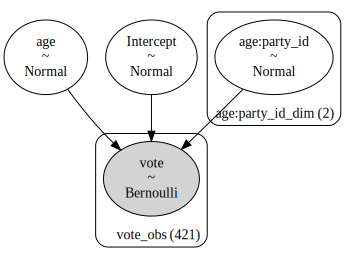

In [20]:
model = bmb.Model("vote[clinton] ~ age + age:party_id", data, family="bernoulli")
model.build()
model.graph()

In [21]:
idata = model.fit()

Modeling the probability that vote==clinton
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Intercept, age, age:party_id]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 6 seconds.


In [22]:
idata.posterior

<xarray.Dataset>
Dimensions:           (chain: 2, draw: 1000, age:party_id_dim: 2)
Coordinates:
  * chain             (chain) int64 0 1
  * draw              (draw) int64 0 1 2 3 4 5 6 ... 993 994 995 996 997 998 999
  * age:party_id_dim  (age:party_id_dim) <U11 'independent' 'republican'
Data variables:
    Intercept         (chain, draw) float64 0.9656 0.4883 ... 0.3168 1.133
    age               (chain, draw) float64 0.01727 0.02236 ... 0.02937 0.02012
    age:party_id      (chain, draw, age:party_id_dim) float64 -0.04594 ... -0...
Attributes:
    created_at:                  2022-12-06T19:26:29.098137
    arviz_version:               0.14.0
    inference_library:           pymc
    inference_library_version:   4.1.7
    sampling_time:               5.522188901901245
    tuning_steps:                1000
    modeling_interface:          bambi
    modeling_interface_version:  0.9.1

int_dim ['independent', 'republican']


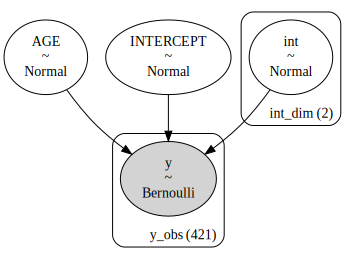

In [23]:
model.set_alias({"age": "AGE", "Intercept": "INTERCEPT", "age:party_id": "int", "vote": "y"})
model.build()
model.graph()

int_dim ['independent', 'republican']


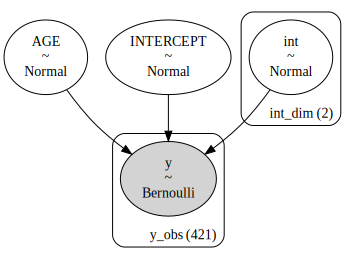

In [25]:
model.set_alias({"age": "AGE", "Intercept": "INTERCEPT", "age:party_id": "int"})
model.build()
model.graph()

In [26]:
idata = model.fit()

Modeling the probability that vote==clinton
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [INTERCEPT, AGE, int]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 5 seconds.


In [27]:
model.predict(idata)

In [28]:
idata.posterior

<xarray.Dataset>
Dimensions:    (chain: 2, draw: 1000, int_dim: 2, y_obs: 421)
Coordinates:
  * chain      (chain) int64 0 1
  * draw       (draw) int64 0 1 2 3 4 5 6 7 ... 992 993 994 995 996 997 998 999
  * int_dim    (int_dim) <U11 'independent' 'republican'
  * y_obs      (y_obs) int64 0 1 2 3 4 5 6 7 ... 413 414 415 416 417 418 419 420
Data variables:
    INTERCEPT  (chain, draw) float64 0.499 0.582 0.1137 ... 0.7901 0.9218 -0.199
    AGE        (chain, draw) float64 0.02639 0.02884 0.03734 ... 0.02032 0.0394
    int        (chain, draw, int_dim) float64 -0.04391 -0.1105 ... -0.1192
    y_mean     (chain, draw, y_obs) float64 0.8783 0.006912 ... 0.7921 0.3811
Attributes:
    created_at:                  2022-12-06T19:28:51.817421
    arviz_version:               0.14.0
    inference_library:           pymc
    inference_library_version:   4.1.7
    sampling_time:               5.125441074371338
    tuning_steps:                1000
    modeling_interface:          bambi
    modeling_interface_version:  0.9.1

---

# Documentation notes

## Names

The logic is `{parent}_{child}`. The exception is the linear predictor of the main parameter, which is only `{child}`.

```python
bmb.Formula(
    "y ~ 1 + x + z",
    "sigma ~ 1 + x"
)
```

* `Intercept`
* `x`
* `z`
* `y_sigma`, the sigma parameter in the normal likelihood
* `sigma_Intercept`
* `sigma_x`

### Potential improvements

What about using just `sigma` instead of `{response_name}_sigma`. The gain: cleaner names. The downside: This pattern could be a conflict in a small number of cases where the name of predictors match the name of parameters in the likelihood. It could be "fixed" easily, by double checking the names of the predictors before creating the model.